[I 08/20/25 19:29:14.044 184155] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Genesis] [19:29:17] [INFO] ╭───────────────────────────────────────────────╮
[Genesis] [19:29:17] [INFO] │┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈ Genesis ┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈│
[Genesis] [19:29:17] [INFO] ╰───────────────────────────────────────────────╯
[Genesis] [19:29:18] [INFO] Consider setting 'performance_mode=True' in production to maximise runtime speed, if significantly increasing compilation time is not a concern.
[Genesis] [19:29:18] [INFO] Running on [NVIDIA A100-SXM4-40GB] with backend gs.cuda. Device memory: 39.49 GB.
[Genesis] [19:29:18] [INFO] 🚀 Genesis initialized. 🔖 version: 0.3.0, 🌱 seed: None, 📏 precision: '32', 🐛 debug: False, 🎨 theme: 'dark'.
[Genesis] [19:29:18] [INFO] Scene <771d508> created.
[Genesis] [19:29:18] [INFO] Scene <21dc249> created.
[Genesis] [19:29:18] [INFO] Adding <gs.RigidEntity>. idx: 0, uid: <150671c>, morph: <gs.morphs.Mesh(file='/workspace/VAGEN/vagen/env/mental_rotation/datasets/assets/axes.glb')>, material: <gs.materials.Rigid>.
[Genesis] [19:29:18] [INFO] Conv

/venv/main/lib/python3.12/site-packages/pygltflib/__init__.py:830: UserWarning: pygltflib currently does not remove image data from the buffer when converting to data uri.Please open an issue at https://gitlab.com/dodgyville/pygltflib/issues
  warnings.warn("pygltflib currently does not remove image data "


[Genesis] [19:29:19] [INFO] Convex hull is not accurate enough for collision detection (0.415). Falling back to more expensive convex decomposition (see FileMorph options).
[Genesis] [19:29:19] [INFO] Running convex decomposition.
[2025-08-20 19:29:19.444] [CoACD] [info] threshold               0.1
[2025-08-20 19:29:19.444] [CoACD] [info] max # convex hull       -1
[2025-08-20 19:29:19.444] [CoACD] [info] preprocess mode         auto
[2025-08-20 19:29:19.444] [CoACD] [info] preprocess resolution   30
[2025-08-20 19:29:19.444] [CoACD] [info] pca                     false
[2025-08-20 19:29:19.444] [CoACD] [info] mcts max depth          3
[2025-08-20 19:29:19.444] [CoACD] [info] mcts nodes              20
[2025-08-20 19:29:19.444] [CoACD] [info] mcts iterations         100
[2025-08-20 19:29:19.444] [CoACD] [info] merge                   true
[2025-08-20 19:29:19.444] [CoACD] [info] decimate                false
[2025-08-20 19:29:19.444] [CoACD] [info] max_ch_vertex           256
[2025-08-

/venv/main/lib/python3.12/site-packages/pygltflib/__init__.py:830: UserWarning: pygltflib currently does not remove image data from the buffer when converting to data uri.Please open an issue at https://gitlab.com/dodgyville/pygltflib/issues
  warnings.warn("pygltflib currently does not remove image data "


[Genesis] [19:29:39] [INFO] Convex hull is not accurate enough for collision detection (0.415). Falling back to more expensive convex decomposition (see FileMorph options).
[Genesis] [19:29:39] [INFO] Running convex decomposition.
[2025-08-20 19:29:39.172] [CoACD] [info] threshold               0.1
[2025-08-20 19:29:39.172] [CoACD] [info] max # convex hull       -1
[2025-08-20 19:29:39.172] [CoACD] [info] preprocess mode         auto
[2025-08-20 19:29:39.172] [CoACD] [info] preprocess resolution   30
[2025-08-20 19:29:39.172] [CoACD] [info] pca                     false
[2025-08-20 19:29:39.172] [CoACD] [info] mcts max depth          3
[2025-08-20 19:29:39.172] [CoACD] [info] mcts nodes              20
[2025-08-20 19:29:39.172] [CoACD] [info] mcts iterations         100
[2025-08-20 19:29:39.172] [CoACD] [info] merge                   true
[2025-08-20 19:29:39.172] [CoACD] [info] decimate                false
[2025-08-20 19:29:39.172] [CoACD] [info] max_ch_vertex           256
[2025-08-

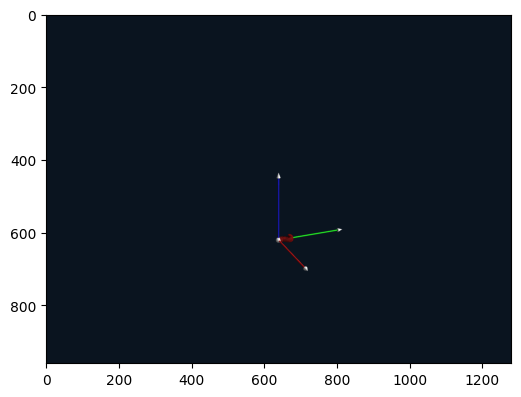

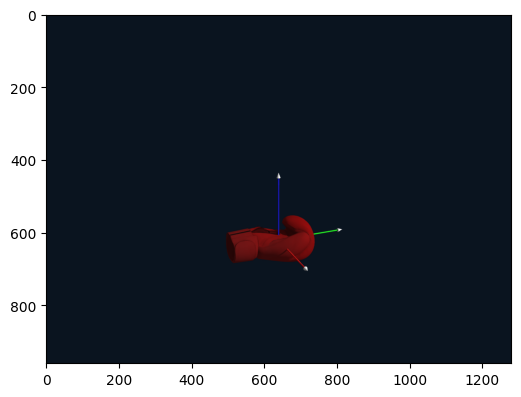

In [1]:
import genesis as gs
from genesis.engine.entities import RigidEntity

gs.init(backend=gs.gpu)
rigid_opts = gs.options.RigidOptions(
    dt=None,  # Inherit from SimOptions; set to 0.0 in SimOptions if needed for static scenes.
    gravity=None,  # Inherit; no gravity needed for static renders.
    enable_collision=False,  # Disable to skip collision kernels.
    enable_joint_limit=False,  # Disable if no joints.
    enable_self_collision=False,  # Already default, but explicit for clarity.
    max_collision_pairs=1,  # Minimal value since collisions are disabled.
    integrator=gs.integrator.Euler,  # Simplest integrator for faster compile.
    IK_max_targets=1,  # Minimal targets to reduce memory/kernels.
    constraint_solver=gs.constraint_solver.CG,  # Default, efficient for minimal use.
    iterations=1,  # Minimal iterations to speed solver kernels.
    tolerance=1e-3,  # Looser tolerance for quicker convergence.
    ls_iterations=1,  # Minimal line search.
    ls_tolerance=0.1,  # Looser for speed.
    sparse_solve=False,  # Disable sparsity exploitation.
    contact_resolve_time=None,  # No need if collisions disabled.
    use_contact_island=False,  # Disable for simplicity.
    use_hibernation=False,  # Disable to avoid extra checks.
    hibernation_thresh_vel=0.001,  # Irrelevant but default.
    hibernation_thresh_acc=0.01   # Irrelevant but default.
)
scene1 = gs.Scene(
    vis_options = gs.options.VisOptions(
        show_world_frame = False, # visualize the coordinate frame of `world` at its origin
        show_link_frame  = False, # do not visualize coordinate frames of entity links
        show_cameras     = False, # do not visualize mesh and frustum of the cameras added
        ambient_light    = (0.1, 0.1, 0.1), # ambient light setting
    ),
    rigid_options=rigid_opts,
    renderer = gs.renderers.Rasterizer(), # using rasterizer for camera rendering
)
scene2 = gs.Scene(
    vis_options = gs.options.VisOptions(
        show_world_frame = False, # visualize the coordinate frame of `world` at its origin
        show_link_frame  = False, # do not visualize coordinate frames of entity links
        show_cameras     = False, # do not visualize mesh and frustum of the cameras added
        ambient_light    = (0.1, 0.1, 0.1), # ambient light setting
    ),
    rigid_options=rigid_opts,
    renderer = gs.renderers.Rasterizer(), # using rasterizer for camera rendering
)


# plane1 = scene1.add_entity(gs.morphs.Plane(pos=(0.0, 0.0, -1)))

for scene in [scene1, scene2]:
    scene.add_entity(
        gs.morphs.Mesh(
            file="../vagen/env/mental_rotation/datasets/assets/axes.glb",
            fixed=True,
            scale=1.2
        ),
    )

scene1.add_entity(
    gs.morphs.Mesh(
        file="../vagen/env/mental_rotation/datasets/assets/objects/glove.glb",
        fixed=True,
        pos=(0.0, 0.0, 0.0),
        euler=(0, 0, 0),
        scale=1
    ),
)

scene2.add_entity(
    gs.morphs.Mesh(
        file="../vagen/env/mental_rotation/datasets/assets/objects/aligned_glove.glb",
        fixed=True,
        pos=(0.0, 0.0, 0.0),
        euler=(0, 0, 0),
        scale=1
    ),
)

cams = []
for scene in [scene1, scene2]:
    cam = scene.add_camera(
        res    = (1280, 960),
        pos    = (10, -4, 5),
        lookat = (0, 0, 1),
        fov    = 30,
    )
    cams.append(cam)

scene1.build()
scene2.build()

import matplotlib.pyplot as plt
for cam in cams:
    rgb = cam.render()[0]
    plt.figure(figsize=(6, 6))    # 可选：调整画布大小
    plt.imshow(rgb)